In [2]:
import numpy as np
import pandas as pd


In [3]:
import os
#filename, file_extension = os.path.splitext('Jeux_de_donnees/cleveland.data')
data = pd.read_csv("Jeux_de_donnees/heart.csv", delimiter=",")
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Correlation entre variables
- obtenir la dépendance entre deux variables catégorielles et entre des variables catégorielles et continues
- Corrélation entre deux variables catégorielles: test du khi-deux, si p_valeur < 0.05 : 2 vars sont dépendante (phu thuoc) -> rejetter l'hypothese null
- Pratique
    + Creer table contingence : table croisé entre les modalités de 2 var
    + Réaliser le teste (l'hypothèse selon laquelle 2 var testées indépendantes ou pas) en utilisant table contingence
- peut mesurer le niveau de corrélation entre les deux var en utilisant le V de Cramer
    + calculer à l’aide de la statistique de test, du degré de liberté et des dimensions de la table de contingence
    + si val >= 0.9 : la relation de très forte
    + si val < 0.1: très faible


In [7]:
from scipy.stats import chi2_contingency
col_risque = []

for col in data.columns[:-1] : 
    table = pd.crosstab(data[col], data["target"])
    resultat_test = chi2_contingency(table)
    n = table.sum()
    crame = np.sqrt(resultat_test[0] / (n*(min(table.shape)-1)))
    
    print("contingence " + col.upper() + " - " + "target".upper())
    print("statistique de test (khi-2) = ", resultat_test[0])
    print("p_valeur = %10.8f" % (resultat_test[1]))
    print("degre de liberte = ", resultat_test[2])
    
    if resultat_test[1] < 0.05:
        print("crame = ", crame)
        print("--> dependant " )

        col_risque.append(col)
    print("----------")

print(col_risque)

contingence AGE vs TARGET
statistique de test (khi-2) =  50.12921465201301
p_valeur = 0.13091219
degre de liberte =  40
----------
contingence SEX vs TARGET
statistique de test (khi-2) =  22.717227046576355
p_valeur = 0.00000188
degre de liberte =  1
crame =  target
0    0.405731
1    0.371053
dtype: float64
--> dependant 
----------
contingence CP vs TARGET
statistique de test (khi-2) =  81.68642755194445
p_valeur = 0.00000000
degre de liberte =  3
crame =  target
0    0.769370
1    0.703612
dtype: float64
--> dependant 
----------
contingence TRESTBPS vs TARGET
statistique de test (khi-2) =  47.70581770079516
p_valeur = 0.48482131
degre de liberte =  48
----------
contingence CHOL vs TARGET
statistique de test (khi-2) =  173.1018906455863
p_valeur = 0.10519230
degre de liberte =  151
----------
contingence FBS vs TARGET
statistique de test (khi-2) =  0.10627276301947715
p_valeur = 0.74442811
degre de liberte =  1
----------
contingence RESTECG vs TARGET
statistique de test (khi-2) = 

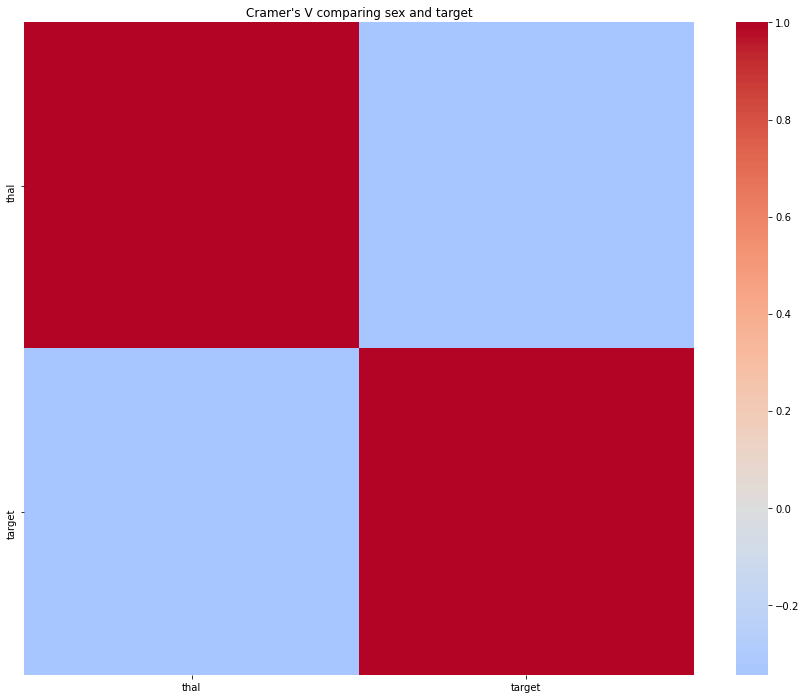

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# first chose your category columns of interest
df = data[['thal', 'target']]

# now change this to dummy variables, one-hot encoded:
DataMatrix = pd.get_dummies(df)

# plot as simply as:
plt.figure(figsize=(15,12))  # for large datasets
plt.title('Cramer\'s V comparing sex and target')
sns.heatmap(DataMatrix.corr('pearson'), cmap='coolwarm', center=0);


In [9]:
data.columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')